# Neural Networks and Matrices

Neural networks, one of the most powerful models in machine learning, are built almost entirely on the concepts of matrices and vector operations that we've been studying. In this lesson, we'll see a concrete example of how a simple neural network works using the dot product.

---
## A Spam Detection Problem

Let's imagine we have a dataset of emails, and we've identified two words that seem important for detecting spam: "lottery" and "win." We've counted the number of times these words appear in a few sample emails.

| # of "lottery" | # of "win" | Is it Spam? |
| :---: | :---: | :---: |
| 1 | 1 | Yes |
| 2 | 1 | Yes |
| 0 | 0 | No |
| 0 | 2 | Yes |
| 0 | 1 | No |
| 1 | 0 | No |
| 2 | 2 | Yes |
| 2 | 0 | Yes |
| 1 | 2 | Yes |

Our goal is to build a **classifier**—a simple machine that can guess if a new email is spam based on the counts of these two words.

---
## The Classifier's Logic

Our classifier will work in two steps:

1.  **Calculate a Score:** We will assign a "weight" (a score) to each word. The total score for an email is the sum of the weights of the words it contains.
    * `Total Score = (weight_lottery * count_lottery) + (weight_win * count_win)`

2.  **Apply a Threshold:** We will choose a "threshold" value.
    * If `Total Score > Threshold`, we classify the email as **Spam**.
    * Otherwise, we classify it as **Not Spam**.

The "learning" task is to find the best weights and the best threshold to make our classifier's guesses match the "Is it Spam?" column in our table as closely as possible.

For this dataset, there are many perfect solutions. For example, if we choose the following values...

* `weight_lottery = 1`
* `weight_win = 1`
* `Threshold = 1.5`

... our classifier correctly identifies every email in our table.

---
## A Geometric View: The Linear Classifier

We can visualize our dataset on a 2D plane, where the axes represent the counts of our two words. The rule `1*lottery + 1*win > 1.5` creates a line that perfectly separates the "Spam" points from the "Not Spam" points. This is a **linear classifier**, and it's the simplest form of a neural network: a one-layer neural network, also known as a **perceptron**.

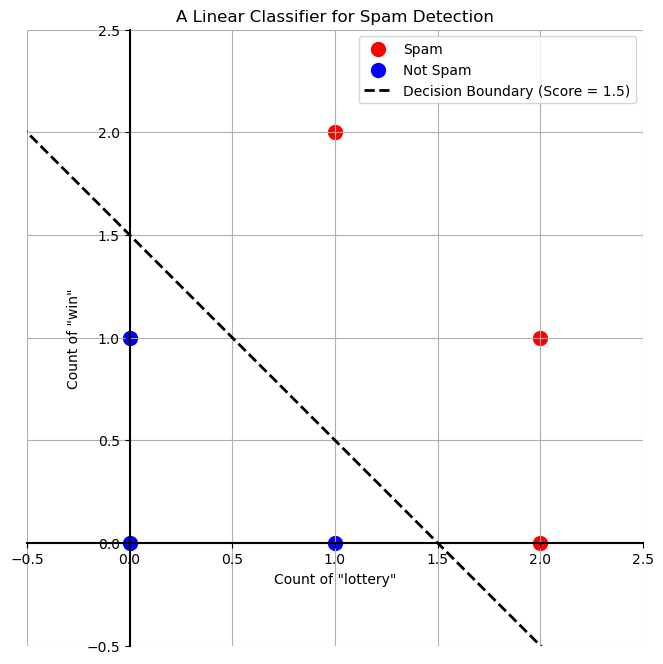

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Create the spam dataset ---
data = {'lottery': [2, 2, 1, 0, 1, 0],
        'win':     [0, 1, 2, 1, 0, 0],
        'spam':    [1, 1, 1, 0, 0, 0]}
df = pd.DataFrame(data)

spam_emails = df[df['spam'] == 1]
not_spam_emails = df[df['spam'] == 0]

# --- Plot the data and the decision boundary ---
plt.figure(figsize=(10, 8))

# Plot the data points
plt.scatter(spam_emails['lottery'], spam_emails['win'], color='red', s=100, label='Spam')
plt.scatter(not_spam_emails['lottery'], not_spam_emails['win'], color='blue', s=100, label='Not Spam')

# Plot the decision boundary line: 1*lottery + 1*win = 1.5
x_vals = np.linspace(-1, 3, 100)
y_vals = 1.5 - x_vals
plt.plot(x_vals, y_vals, 'k--', linewidth=2, label='Decision Boundary (Score = 1.5)')

# --- Format the plot ---
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)
plt.xlabel('Count of "lottery"')
plt.ylabel('Count of "win"')
plt.title('A Linear Classifier for Spam Detection')
plt.grid(True)
plt.legend()

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

---

## The One-Layer Neural Network as a Matrix Product

The process of calculating the score for every email at once can be expressed as a single **matrix-vector product**.

* The **Data Matrix (X)** contains the features for all our emails.
* The **Model Vector (w)** contains the weights for our words.

$$
\text{Data Matrix (X)} = \begin{bmatrix}
1 & 1 \\
2 & 1 \\
0 & 0 \\
0 & 2 \\
0 & 1 \\
1 & 0 \\
2 & 2 \\
2 & 0 \\
1 & 2
\end{bmatrix}
\quad
\text{Model Vector (w)} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

The product $Xw$ gives us a vector of the total scores for each email:

$$
\begin{bmatrix}
1 & 1 \\
2 & 1 \\
0 & 0 \\
0 & 2 \\
0 & 1 \\
1 & 0 \\
2 & 2 \\
2 & 0 \\
1 & 2
\end{bmatrix}
\begin{bmatrix} 1 \\ 1 \end{bmatrix}
=
\begin{bmatrix} 2 \\ 3 \\ 0 \\ 2 \\ 1 \\ 1 \\ 4 \\ 2 \\ 3 \end{bmatrix}
$$  

We can then apply our threshold check (`> 1.5`) to this score vector to get our final predictions.

---
## The Bias Trick

Instead of using a separate threshold, it's more common in neural networks to incorporate it into the model as a **bias** term.

The check `score > 1.5` is equivalent to `score - 1.5 > 0`. This `-1.5` is our bias.

We can include the bias in our matrix multiplication by adding a column of `1`s to our data matrix and adding the bias term to our model vector. The check then simplifies to just checking if the result is positive:

**1. Augment the Data Matrix (X):** We add a column of ones.  

$$
X_{aug} = \begin{bmatrix}
1 & 1 & 1 \\
2 & 1 & 1 \\
0 & 0 & 1 \\
0 & 2 & 1 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
2 & 2 & 1 \\
2 & 0 & 1 \\
1 & 2 & 1
\end{bmatrix}
$$  

**2. Augment the Model Vector (w):** We add the bias term.  

$w_{aug} = \begin{bmatrix} 1 \\ 1 \\ -1.5 \end{bmatrix}$

**3. Perform the Matrix-Vector Multiplication:**

$$
X_{aug} \cdot w_{aug} = \begin{bmatrix}
1 & 1 & 1 \\
2 & 1 & 1 \\
0 & 0 & 1 \\
0 & 2 & 1 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
2 & 2 & 1 \\
2 & 0 & 1 \\
1 & 2 & 1
\end{bmatrix}
\begin{bmatrix} 1 \\ 1 \\ -1.5 \end{bmatrix}
=
\begin{bmatrix} 0.5 \\ 1.5 \\ -1.5 \\ 0.5 \\ -0.5 \\ -0.5 \\ 2.5 \\ 0.5 \\ 1.5 \end{bmatrix}
$$  

Now, we just need to check if these results are greater than 0. This gives us the exact same predictions as checking if the original scores were greater than 1.5. This "bias trick" is the standard way neural networks handle thresholds.

---
## The AND Operator: Another Linearly Separable Problem

This same simple neural network structure can be used to model basic logical operations. Let's look at the **AND** operator. The AND operator is true (outputs 1 or "Yes") only when both its inputs are true (1 or "Yes"), and false (outputs 0 or "No") otherwise:

| x | y | x AND y |
|:-:|:-:|:-------:|
| 0 | 0 | 0 (No)  |
| 1 | 0 | 0 (No)  |
| 0 | 1 | 0 (No)  |
| 1 | 1 | 1 (Yes) |

We can use a perceptron (a one-layer neural network) to model this. Let's use the same weights as before (`weight_x = 1`, `weight_y = 1`) and adjust the bias.

Our score will be: `score = (1 * x) + (1 * y)`

Let's try a bias of `-1.5`. Our condition for "AND is True" becomes:
`score - 1.5 > 0`  or  `x + y - 1.5 > 0`

Let's see how this works for our dataset:

* **x=0, y=0:** `0 + 0 - 1.5 = -1.5` (Not > 0) -> **No** (Correct)
* **x=1, y=0:** `1 + 0 - 1.5 = -0.5` (Not > 0) -> **No** (Correct)
* **x=0, y=1:** `0 + 1 - 1.5 = -0.5` (Not > 0) -> **No** (Correct)
* **x=1, y=1:** `1 + 1 - 1.5 = 0.5` (> 0) -> **Yes** (Correct)

This simple perceptron with the weights `w = [1, 1]` and a bias `b = -1.5` correctly implements the AND operator.

You can visualize this as a line separating the points (0,0), (1,0), and (0,1) from the point (1,1) on a 2D plane. The equation of the line is $x + y - 1.5 = 0$.

You can also represent this perceptron graphically as a node that takes inputs x and y, multiplies them by their respective weights, adds the bias, and then applies an activation function (in this case, checking if the result is greater than zero).

![Perceptron 1](./images/perceptron_1.png)

---

### The Perceptron Diagram

The diagram below illustrates the structure of a simple perceptron. The inputs (features `x₁` and `x₂`) are fed into the main node, each multiplied by its corresponding weight (`w₁` and `w₂`). Inside the node, this weighted sum is added to a bias term (`b`). The result is then passed through an **activation function**, which acts as a decision-maker to produce the final output—a classification of either **1** (e.g., "Spam", "Will Churn", "Yes") or **0** (e.g., "Not Spam", "Will Not Churn", "No").

![Perceptron 1](./images/perceptron_2.png)